In [46]:
# # Import from Kaggle (programmatic)

# import kaggle
# import pandas as pd

# import numpy as np

# kaggle.api.authenticate()

# kaggle.api.dataset_download_files('rabieelkharoua/students-performance-dataset', 
#                                   path='/mnt/SSD500GB/apprenticeship/dspp/data_science_project', 
#                                   unzip=True)

# Data science project - Student Performance Prediction


## Predicting Pass/Fail Outcomes Using Logistic Regression


**Dataset**: Student Performance Data (Kaggle)



**Target/Aim**: Binary classification - Pass (Grades A-C) vs Fail (Grades D-F)



**Model Choice**: Logistic Regression



**Assessment Context**: This project demonstrates data science portfolio skills including:

- Data quality assessment using Gov UK Data Quality Framework

- Missing value handling strategies

- Feature engineering and scaling

- Model evaluation using multiple metrics

- Bias and fairness analysis

- Practical deployment simulation

 ## Import Libraries and Load Dataset

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")


Libraries imported successfully!


 ## Load Data

In [48]:
# Load the dataset
df = pd.read_csv('Student_performance_data _.csv')

 ## Initial Data Exploration

In [49]:
# Print size stats
print(f"Dataset shape: {df.shape}")

# Display the first few rows of the dataframe
print(f"First few rows:")
display(df.head())

# Check column names and types
print("="*50)
print("Column information")
print("="*50)
print("\nData types:")
print(df.info())


Dataset shape: (2392, 15)
First few rows:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Column information

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 2

In [50]:
# Check for missing values
print("="*50)
print("Missing values check")
print("="*50)
print(df.isnull().sum())
print(f"Total missing values: {df.isnull().sum().sum()}")


Missing values check
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
Total missing values: 0


In [51]:
# Basic statistics and distribution
print("="*50)
print("Descriptive statistics")
print("="*50)
df.describe()


Descriptive statistics


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


## Data understanding & Feature definitions

### Demographics:

- `Age`: 15-18 years

- `Gender`: 0=Male, 1=Female

- `Ethnicity`: 0=Caucasian, 1=African American, 2=Asian, 3=Other

- `ParentalEducation`: 0=None, 1=High School, 2=Some College, 3=Bachelor's, 4=Higher



### Study Habits:

- `StudyTimeWeekly`: Hours per week (0-20)

- `Absences`: Number during school year (0-30)

- `Tutoring`: 0=No, 1=Yes



### Parental Involvement:

- `ParentalSupport`: 0=None, 1=Low, 2=Moderate, 3=High, 4=Very High



### Extracurricular:

- `Extracurricular`: 0=No, 1=Yes

- `Sports`: 0=No, 1=Yes

- `Music`: 0=No, 1=Yes

- `Volunteering`: 0=No, 1=Yes



### Academic Performance:

- `GPA`: 2.0-4.0 scale

- `GradeClass`: 0='A', 1='B', 2='C', 3='D', 4='F'

In [52]:
# Quick view of top rows

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


 ## Create Target Variable: Pass/Fail

In [53]:
# Create binary target variable

# Pass = Grades A, B, C (GradeClass 0, 1, 2) - GPA >= 2.5

# Fail = Grades D, F (GradeClass 3, 4) - GPA < 2.5

df['PassFail'] = (df['GradeClass'] < 3).astype(int)  # 1=Pass, 0=Fail

print("="*50)
print("Target variable created (1=pass, 2=fail)")
print("="*50)

print(f"\nTarget variable distribution:")
print(df['PassFail'].value_counts())

print(f"\nPercentage split:")
print(df['PassFail'].value_counts(normalize=True) * 100)

print(f"\nPass Rate: {(df['PassFail']==1).sum()/len(df)*100:.1f}%")
print(f"Fail Rate: {(df['PassFail']==0).sum()/len(df)*100:.1f}%")


Target variable created (1=pass, 2=fail)

Target variable distribution:
PassFail
0    1625
1     767
Name: count, dtype: int64

Percentage split:
PassFail
0    67.934783
1    32.065217
Name: proportion, dtype: float64

Pass Rate: 32.1%
Fail Rate: 67.9%


`This is syntheic data so this is not to be taken as an a real-world result` - 67.9% may not be realistic for fail rates.

In [54]:
# View fataset after PassFail column added

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,PassFail
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,0


 ## Check for Duplicates

In [55]:
# Count number of full line duplicates
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Logic for duplicate rows counts then produce a message depending on results
if duplicates_count > 0:
    print(f"Showing duplicate rows:")
    duplicates_df = df[df.duplicated(keep=False)].sort_values(by='StudentID')
    print(duplicates_df.head())
else:
    print("No duplicate rows found - data is clean!")


Number of duplicate rows: 0
No duplicate rows found - data is clean!


## Remove unnecessary columns

- StudentID: Non-predictive identifier

- GPA & GradeClass: Direct target influence as they directly determine Pass/Fail

In [56]:
# Create working dataframe with necessary columns only
print("="*50)
print("Feature selection")
print("="*50)

# Features to drop (ID and target leakage)
features_to_drop = ['StudentID', 'GPA', 'GradeClass']

# Create feature matrix
student_df = df.drop(columns=features_to_drop)

print(f"\nOriginal columns: {len(df.columns)}")
print(f"Columns after removal: {len(student_df.columns)}")
print(f"\nRemaining features: {list(student_df.columns)}")
print(f"\nDataset shape: {student_df.shape}")


Feature selection

Original columns: 16
Columns after removal: 13

Remaining features: ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'PassFail']

Dataset shape: (2392, 13)


In [57]:
# View after the columns being removed
student_df.head()


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,PassFail
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,1
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,0


# Data quality assessment - Gov UK Data Quality Framework

In [58]:
# Copy the dataset for quality checks
df_quality_check = df.copy()

### Completeness

In [59]:
print(f"Is Null:\n")

print(df_quality_check.isnull().sum())
print("\n")
print(30*"=")

print(f"\nIs NA:\n")

print(df_quality_check.isna().sum())

Is Null:

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
PassFail             0
dtype: int64



Is NA:

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
PassFail             0
dtype: int64


### Accuracy

In [60]:
accuracy_checks = {
    'Invalid GPA': len(df_quality_check[(df_quality_check['GPA'] < 0) | (df_quality_check['GPA'] > 4.0)]),
    'Invalid Absences': len(df_quality_check[df_quality_check['Absences'] > 180]),
    'Invalid Age': len(df_quality_check[(df_quality_check['Age'] < 14) | (df_quality_check['Age'] > 19)]),
    'Unrealistic Study Time': len(df_quality_check[df_quality_check['StudyTimeWeekly'] > 40])
}


total_issues = sum(accuracy_checks.values())

print(f"Accuracy issues: {total_issues}")

Accuracy issues: 0


### Validity

In [61]:
binary_fields = ['Gender', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
invalid_binary = sum(
    not df_quality_check[col].isin([0, 1]).all()
    for col in binary_fields
)
print(invalid_binary)

0


### Consistency

In [62]:
duplicate_counts = df_quality_check['StudentID'].value_counts()
duplicates = duplicate_counts[duplicate_counts > 1]
print(f" Count of more than 1 student ID: {len(duplicates)}")

 Count of more than 1 student ID: 0


### Uniqueness

In [63]:
duplicates = df_quality_check.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


 # Exploratory Data Analysis (EDA)

 ## Is the Dataset Balanced?

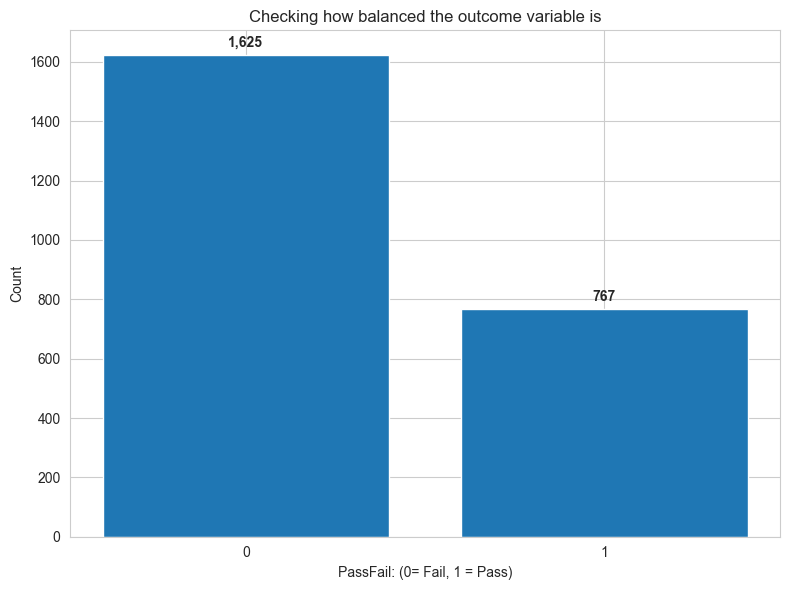

In [64]:
import matplotlib.pyplot as plt

# Count the values in same_day_output
value_counts = df['PassFail'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index.astype(str), value_counts.values)

# Add title and labels
plt.title('Checking how balanced the outcome variable is')
plt.xlabel('PassFail: (0= Fail, 1 = Pass)')
plt.ylabel('Count')

# Add value labels on top of bars
for i, v in enumerate(value_counts.values):
    plt.text(i, v + max(value_counts.values) * 0.01, f'{v:,}', 
             ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


 Data seems to be unbalanced but we should be able to continue with this and must be aware when looking at results

 # Machine Learning - Logistic Regression

### Split into Train-Test datasets

In [65]:


from sklearn.model_selection import train_test_split

# We have retained 20% of the data for the test set
df_train, df_test = train_test_split(student_df, test_size=0.2, random_state=1234, stratify=student_df['PassFail'])

print("="*50)
print("TRAIN-TEST SPLIT")
print("="*50)
print(f"\nTrain set size: {len(df_train)} ({len(df_train)/len(student_df)*100:.1f}%)")
print(f"Test set size: {len(df_test)} ({len(df_test)/len(student_df)*100:.1f}%)")
print(f"\nTrain shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")

TRAIN-TEST SPLIT

Train set size: 1913 (80.0%)
Test set size: 479 (20.0%)

Train shape: (1913, 13)
Test shape: (479, 13)


### Verify Train-Test Split Proportions

In [66]:
# check the proportion split of outcome variable within the train and test sets
print("\nTrain Set Distribution:")
print(df_train['PassFail'].value_counts(normalize=True))

print("\nTest Set Distribution:")
print(df_test['PassFail'].value_counts(normalize=True))


Train Set Distribution:
PassFail
0    0.679561
1    0.320439
Name: proportion, dtype: float64

Test Set Distribution:
PassFail
0    0.678497
1    0.321503
Name: proportion, dtype: float64


### Visualise the train test split

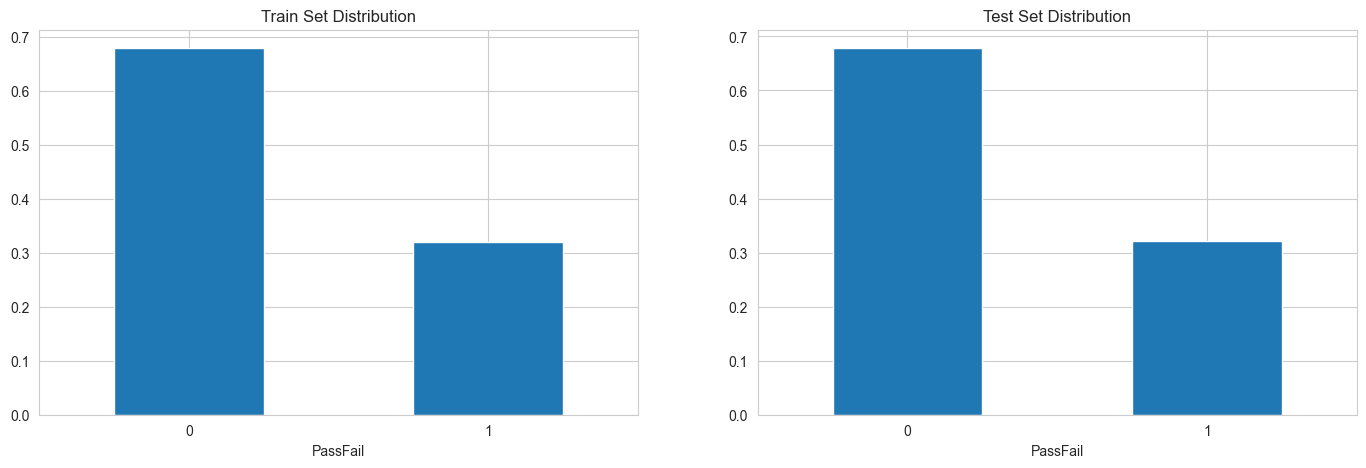

In [67]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(17, 5))

# Plot for train set
df_train['PassFail'].value_counts(normalize=True).plot(kind='bar', ax=axs[0])
axs[0].set_title("Train Set Distribution")
axs[0].tick_params(axis='x', rotation=0)

# Plot for test set
df_test['PassFail'].value_counts(normalize=True).plot(kind='bar', ax=axs[1])
axs[1].set_title('Test Set Distribution')
axs[1].tick_params(axis='x', rotation=0)

plt.show()


## Correlation Analysis on Training Set

In [68]:
corr = df_train.corr(numeric_only=True)
corr

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,PassFail
Age,1.000000,0.058503,-0.043150,0.015587,-0.008227,-0.002350,-0.011696,0.030671,-0.015190,-0.041198,0.006224,0.011894,-0.006499
Gender,0.058503,1.000000,0.024730,0.010482,0.014371,0.018245,-0.038658,0.004421,-0.027651,-0.002148,-0.005736,-0.001548,-0.029034
Ethnicity,-0.043150,0.024730,1.000000,0.049551,0.000225,-0.022331,-0.003545,0.014040,-0.009396,-0.007621,-0.032439,0.018995,0.008540
ParentalEducation,0.015587,0.010482,0.049551,1.000000,-0.005179,0.039690,-0.013760,-0.020807,0.002251,-0.006370,0.042343,0.028079,-0.051039
StudyTimeWeekly,-0.008227,0.014371,0.000225,-0.005179,1.000000,0.010301,-0.000429,0.054504,-0.016411,-0.005367,0.021461,-0.016427,0.113659
Absences,-0.002350,0.018245,-0.022331,0.039690,0.010301,1.000000,-0.024689,0.000377,-0.000333,0.035228,-0.013148,0.003291,-0.660061
Tutoring,-0.011696,-0.038658,-0.003545,-0.013760,-0.000429,-0.024689,1.000000,-0.006141,-0.011096,0.010686,-0.018493,-0.056786,0.088026
ParentalSupport,0.030671,0.004421,0.014040,-0.020807,0.054504,0.000377,-0.006141,1.000000,0.015010,-0.006394,0.038024,0.006937,0.101767
Extracurricular,-0.015190,-0.027651,-0.009396,0.002251,-0.016411,-0.000333,-0.011096,0.015010,1.000000,0.003622,-0.020160,-0.006749,0.077886
Sports,-0.041198,-0.002148,-0.007621,-0.006370,-0.005367,0.035228,0.010686,-0.006394,0.003622,1.000000,-0.041217,0.002720,0.017414


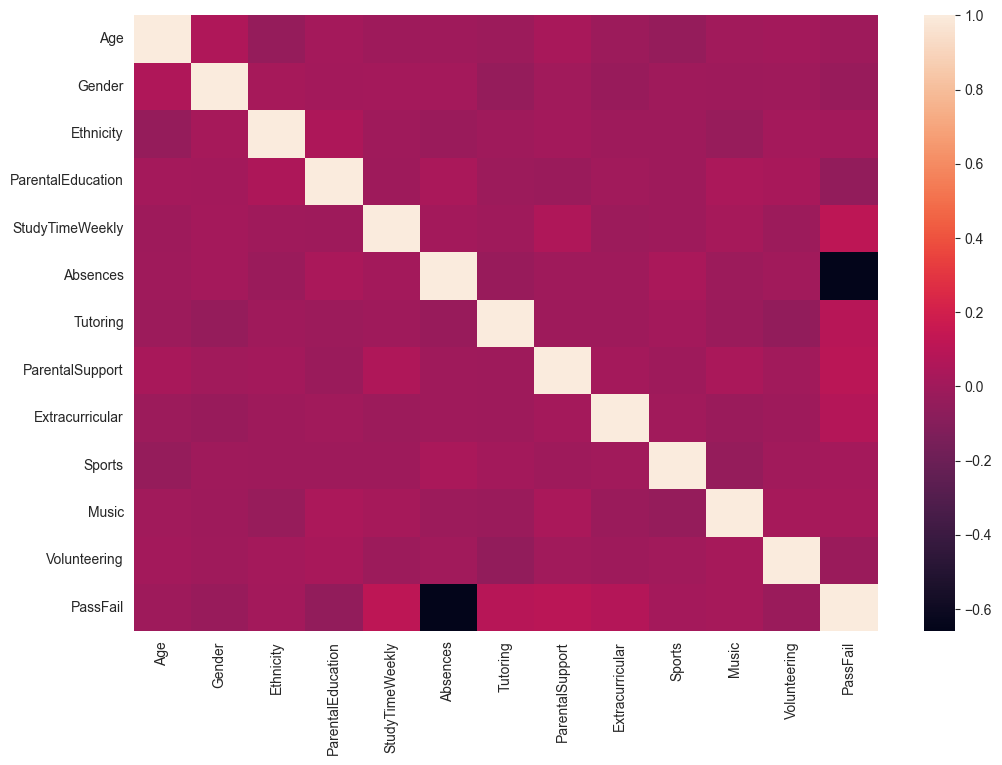

In [69]:
import seaborn as sns

sns.heatmap(corr,
         xticklabels=corr.columns,
         yticklabels=corr.columns)
plt.show()

Absences appears to be really strong negative and the others are less impactful

## Prepare X and y for modeling

In [70]:
# Separate out the outcome variable that we are trying to predict (the 'y' variable)

X_train = df_train.drop('PassFail', axis=1)
X_test = df_test.drop('PassFail', axis=1)

y_train = df_train['PassFail']
y_test = df_test['PassFail']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1913, 12)
(479, 12)
(1913,)
(479,)


In [71]:
# View the top of the train dataset
X_train.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
2146,15,0,0,1,12.324485,0,0,1,1,0,0,0
1895,17,0,1,2,15.033595,1,0,1,0,0,0,0
2068,16,1,0,3,9.850437,16,0,1,1,0,0,0
1491,17,1,0,2,3.549637,5,0,4,0,0,0,0
990,16,0,0,0,1.045373,19,1,2,0,0,1,0


In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 2146 to 161
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1913 non-null   int64  
 1   Gender             1913 non-null   int64  
 2   Ethnicity          1913 non-null   int64  
 3   ParentalEducation  1913 non-null   int64  
 4   StudyTimeWeekly    1913 non-null   float64
 5   Absences           1913 non-null   int64  
 6   Tutoring           1913 non-null   int64  
 7   ParentalSupport    1913 non-null   int64  
 8   Extracurricular    1913 non-null   int64  
 9   Sports             1913 non-null   int64  
 10  Music              1913 non-null   int64  
 11  Volunteering       1913 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 194.3 KB


## Feature Scaling (Standardisation)

In [73]:
# scaling the data
# StandardScaler rescales the data to have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")  # returns a pandas df rather than numpy array
scaler.fit(X_train)   # You fit on the train set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)     # This uses the fit from the training set not the test!!!

In [74]:
X_train_scaled.shape

(1913, 12)

## Train Logistic Regression Model

In [75]:

# training with the scaled data
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met

# step 1: initialise the model
model_scaled = LogisticRegression()

# step 2: train the model
model_scaled.fit(X_train_scaled, y_train)

# step 3: generate y_pred
y_pred_scaled_model = model_scaled.predict(X_test_scaled)



## Model Assessment & Evaluation


### Helpful guide to reading results:
* Accuracy is the proportion we predicted correctly
* Precision is the proportion of predicted positives that are correct
* Recall = sensitivity = True Positive Rate = is the proportion of all actual positives that were predicted as positives
* Specificity is the proportion of actual negatives that were predicted to be negative
* F1 score is a measure that combines precision and recall: F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

## Performance Metrics

In [76]:

import numpy as np

# Useful read:
# https://datascience.stackexchange.com/questions/73974/balanced-accuracy-vs-f1-score

# Metrics for the Model that uses scaled data
accuracy = met.accuracy_score(y_test, y_pred_scaled_model)
balanced_accuracy = met.balanced_accuracy_score(y_test, y_pred_scaled_model)
f1 = met.f1_score(y_test, y_pred_scaled_model)

print("="*50)
print("MODEL PERFORMANCE")
print("="*50)
print("Accuracy:", np.round(accuracy*100.0,1))
print("Balanced Accuracy:", np.round(balanced_accuracy*100.0,2)) # Average of sensitivity and specificity (V useful when unbalanced)
print("F1-score: ", np.round(f1*100.0,2)) # F1 score doesn't care about how many true negatives are being classified

MODEL PERFORMANCE
Accuracy: 89.1
Balanced Accuracy: 87.39
F1-score:  83.01


## Confusion Matrix

In [77]:
# this is a basic confusion matrix
cm = met.confusion_matrix(y_test, y_pred_scaled_model)
print(cm)


[[300  25]
 [ 27 127]]


## Confusion Matrix Visualization

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       325
           1       0.84      0.82      0.83       154

    accuracy                           0.89       479
   macro avg       0.88      0.87      0.88       479
weighted avg       0.89      0.89      0.89       479



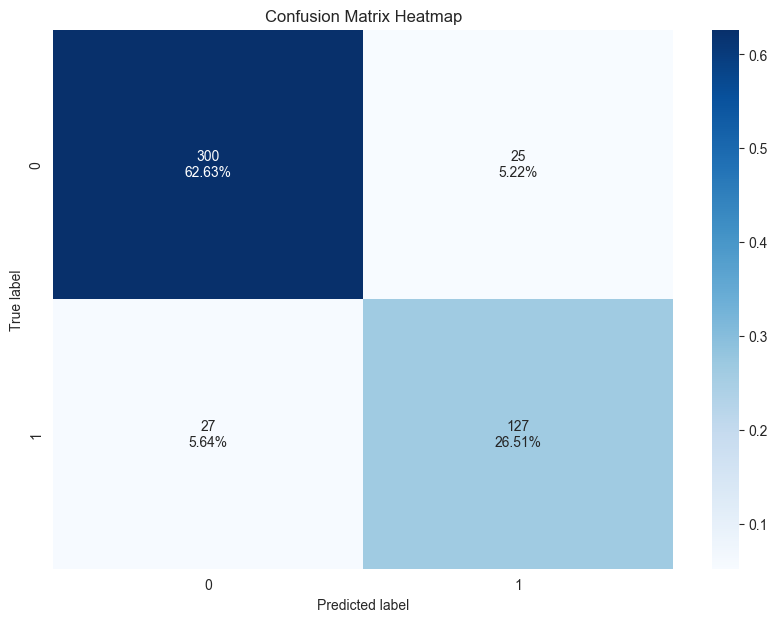

In [78]:

# confusion matrix plot
def visualize_classification(y_test, y_pred):
    """
    Visualises the classification performance with a confusion matrix
    """
    # Generate and print the classification report
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    cr = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(cr)
    # Generate the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred.round())

    # Create custom annotations with both counts and percentages
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in (cf_matrix/np.sum(cf_matrix)).flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(cf_matrix.shape)

    # Create the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()


visualize_classification(y_test, y_pred_scaled_model)

## ROC Curve

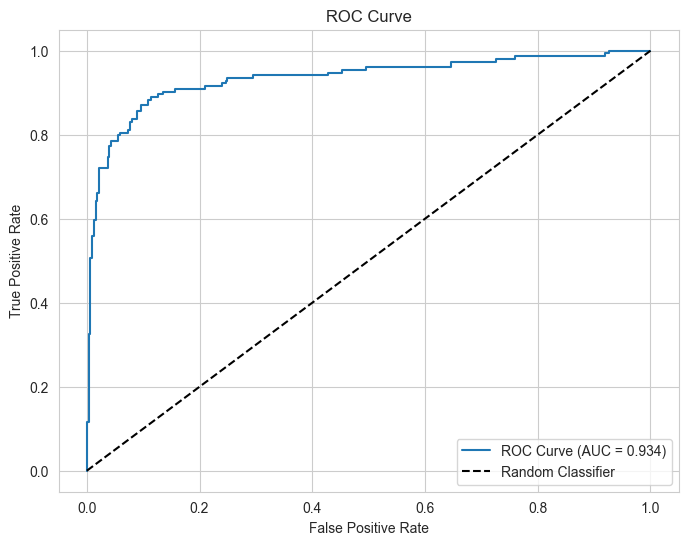

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get prediction probabilities
y_pred_proba = model_scaled.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
print(f"auc: {round(auc_score, ndigits=2)}")

auc: 0.93


## Feature Importance Analysis

In [81]:
# Extract feature coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model_scaled.coef_[0]
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("="*50)
print("Feature importance analysis")
print("="*50)
print("\nTop Features by Absolute Coefficient Value:")
print(feature_importance[['Feature', 'Coefficient', 'Abs_Coefficient']])

print("\n" + "="*50)
print("Coefficient interpretation")
print("="*50)
print("• Positive coefficient = Increases probability of FAILURE")
print("• Negative coefficient = Increases probability of PASSING")
print("\nTop 5 Most Important Features:")
for idx, row in feature_importance.head().iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"  {row['Feature']:25} → {direction} failure risk")



Feature importance analysis

Top Features by Absolute Coefficient Value:
              Feature  Coefficient  Abs_Coefficient
5            Absences    -2.657358         2.657358
4     StudyTimeWeekly     0.542410         0.542410
7     ParentalSupport     0.459435         0.459435
6            Tutoring     0.357034         0.357034
8     Extracurricular     0.336545         0.336545
9              Sports     0.201880         0.201880
3   ParentalEducation    -0.100326         0.100326
10              Music     0.096982         0.096982
1              Gender    -0.064288         0.064288
11       Volunteering    -0.032420         0.032420
2           Ethnicity     0.013036         0.013036
0                 Age    -0.011827         0.011827

Coefficient interpretation
• Positive coefficient = Increases probability of FAILURE
• Negative coefficient = Increases probability of PASSING

Top 5 Most Important Features:
  Absences                  → decreases failure risk
  StudyTimeWeekly     

## Feature Importance Visualization

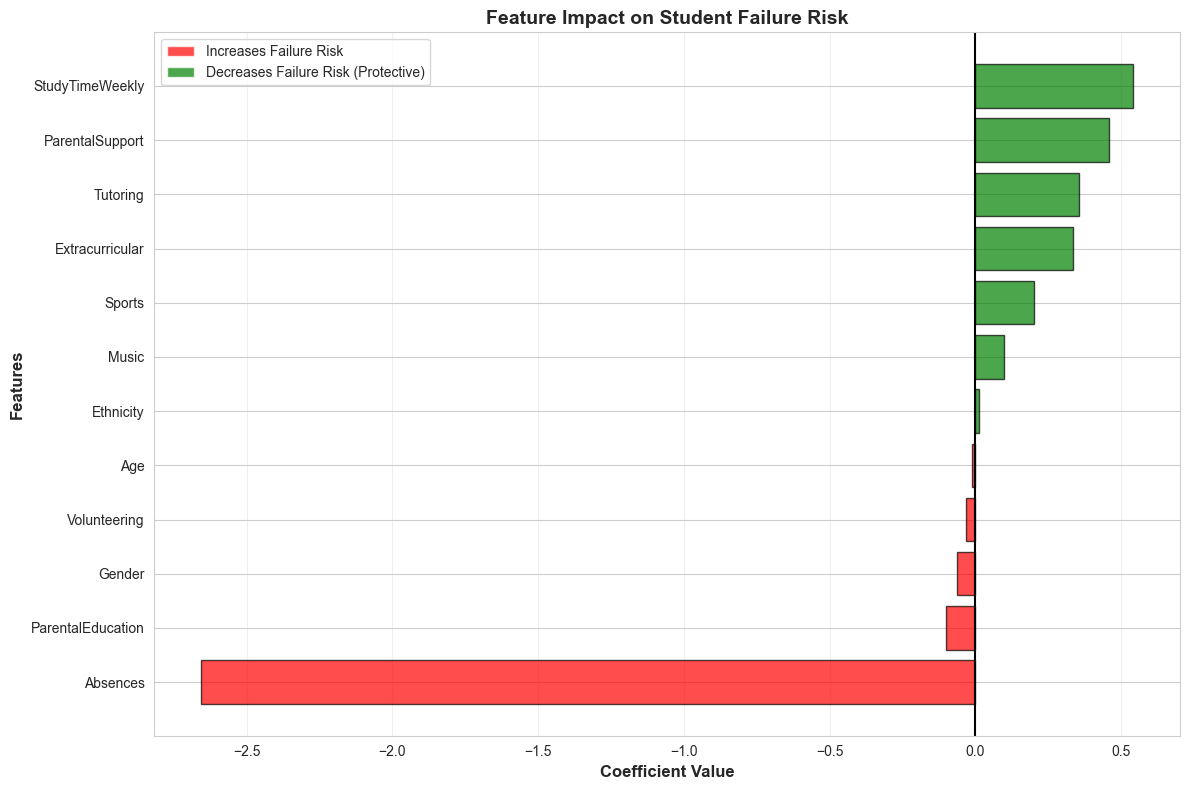

In [82]:
# Visualize feature importance
plt.figure(figsize=(12, 8))

# Get all features sorted by coefficient
features_sorted = feature_importance.sort_values('Coefficient', ascending=True)

# Color code: red for increases failure risk, green for decreases
colors = ['red' if x < 0 else 'green' for x in features_sorted['Coefficient']]

plt.barh(features_sorted['Feature'], features_sorted['Coefficient'], 
         color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Impact on Student Failure Risk', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
plt.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', alpha=0.7, label='Increases Failure Risk'),
    Patch(facecolor='green', alpha=0.7, label='Decreases Failure Risk (Protective)')
]
plt.legend(handles=legend_elements, loc='best', fontsize=10)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

## Prediction Probability Distribution

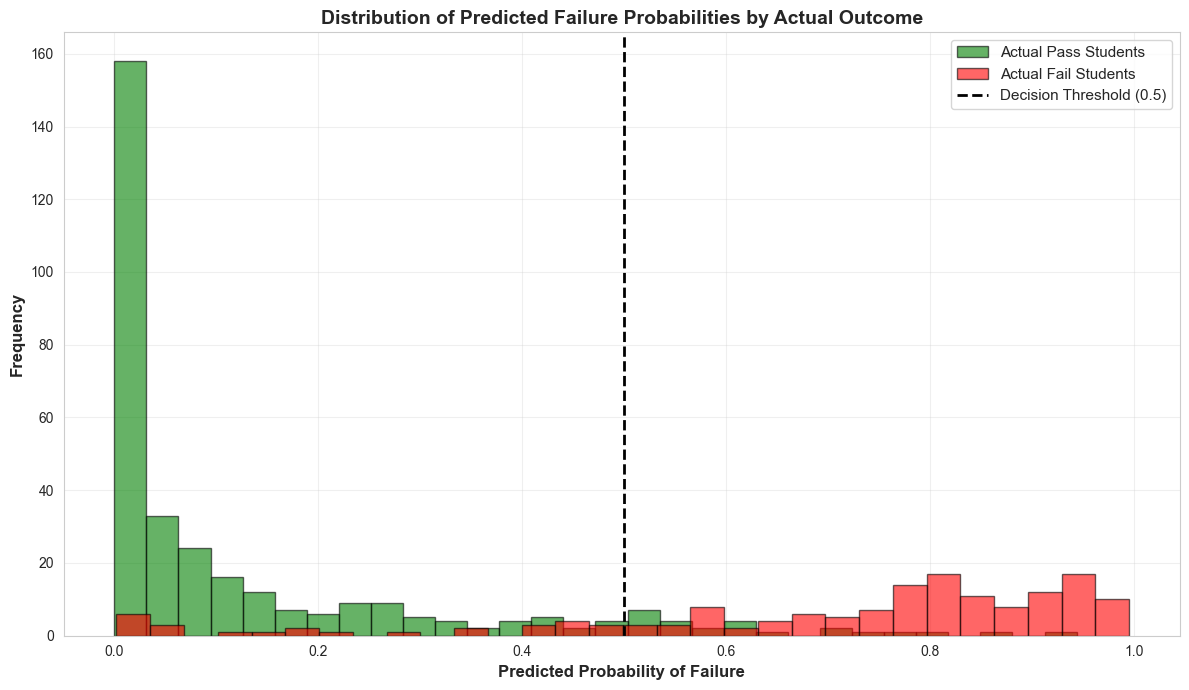

PROBABILITY DISTRIBUTION INSIGHTS

Ideal scenario: Clear separation between distributions
• Green (Pass) concentrated near 0
• Red (Fail) concentrated near 1

Overlap indicates students with similar characteristics but different outcomes


In [83]:
plt.figure(figsize=(12, 7))

# Plot histograms for actual pass and fail students
plt.hist(y_pred_proba[y_test==0], bins=30, alpha=0.6, 
         label='Actual Pass Students', color='green', edgecolor='black')
plt.hist(y_pred_proba[y_test==1], bins=30, alpha=0.6, 
         label='Actual Fail Students', color='red', edgecolor='black')

plt.xlabel('Predicted Probability of Failure', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Predicted Failure Probabilities by Actual Outcome', 
          fontsize=14, fontweight='bold')

# Add decision threshold line
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=2, 
            label='Decision Threshold (0.5)')

plt.legend(fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('probability_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("="*50)
print("PROBABILITY DISTRIBUTION INSIGHTS")
print("="*50)
print("\nIdeal scenario: Clear separation between distributions")
print("• Green (Pass) concentrated near 0")
print("• Red (Fail) concentrated near 1")
print("\nOverlap indicates students with similar characteristics but different outcomes")

## Statistical Significance Testing (Statsmodels)

In [84]:
import statsmodels.api as sm

print("="*50)
print("Statistical significance analysis")
print("="*50)

# Prepare data for statsmodels
X_train_sm = sm.add_constant(X_train_scaled)  # Add intercept term
X_test_sm = sm.add_constant(X_test_scaled)

# Fit logistic regression with statistical output
logit_model = sm.Logit(y_train, X_train_sm)
fitted_model = logit_model.fit()

# Get the statistical summary
print("\n" + "="*50)
print("Logistic regression statistical summary")
print("="*50)
print(fitted_model.summary())

# Extract and display key statistics for top features
print("\n" + "="*50)
print("Top features - detailed statistics")
print("="*50)

for feature in feature_importance.head()['Feature']:
    if feature in fitted_model.params.index:
        coef = fitted_model.params[feature]
        p_value = fitted_model.pvalues[feature]
        conf_int = fitted_model.conf_int().loc[feature]
        
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
        
        print(f"\n{feature}:")
        print(f"  Coefficient: {coef:.4f} {significance}")
        print(f"  P-value: {p_value:.4f}")
        print(f"  95% CI: [{conf_int[0]:.4f}, {conf_int[1]:.4f}]")
        
        if p_value < 0.05:
            print(f"  ✓ Statistically significant (p < 0.05)")
        else:
            print(f"  ✗ Not statistically significant")

print("\n" + "="*50)
print("Significance levels")
print("="*50)
print("*** p < 0.001 (Highly significant)")
print("**  p < 0.01  (Very significant)")
print("*   p < 0.05  (Significant)")


Statistical significance analysis
Optimization terminated successfully.
         Current function value: 0.315924
         Iterations 8

Logistic regression statistical summary
                           Logit Regression Results                           
Dep. Variable:               PassFail   No. Observations:                 1913
Model:                          Logit   Df Residuals:                     1900
Method:                           MLE   Df Model:                           12
Date:                Sat, 03 Jan 2026   Pseudo R-squ.:                  0.4963
Time:                        18:52:02   Log-Likelihood:                -604.36
converged:                       True   LL-Null:                       -1199.8
Covariance Type:            nonrobust   LLR p-value:                1.546e-247
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

## Additional ROC Curve with Confusion Matrix

In [85]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

def plot_roc_cm(y_true, y_pred_proba, model, name):
    # compute fpr and tpr for roc curve - using PROBABILITIES
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # compute the confusion matrix - using BINARY predictions from probabilities
    y_pred_binary = np.where(y_pred_proba > 0.5, 1, 0)
    mat = confusion_matrix(y_true, y_pred_binary)
    cr = classification_report(y_true, y_pred_binary)
    print(cr)

    # plot the ROC curve
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    ax1.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curve of {}'.format(name))
    ax1.legend(loc='lower right')

    # plot the confusion matrix
    names = ["True Negative", "False Positive", "False Negative", "True Positive"]
    counts = ["{0:0.0f}".format(value) for value in mat.flatten()]
    percents = ["{0:.2%}".format(value) for value in mat.flatten()/np.sum(mat)]
    labels = ["{}\n{}\n{}".format(a, b, c) for a, b, c in zip(names, counts, percents)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(mat, annot=labels, fmt="", cmap="Blues", ax=ax2)
    ax2.set(xlabel="Predicted", ylabel="Actual",
       title='Confusion Matrix of {}'.format(name))
    
    print("ROC AUC score: ", roc_auc)

    plt.tight_layout()
    plt.show()

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       325
           1       0.84      0.82      0.83       154

    accuracy                           0.89       479
   macro avg       0.88      0.87      0.88       479
weighted avg       0.89      0.89      0.89       479

ROC AUC score:  0.9339660339660338


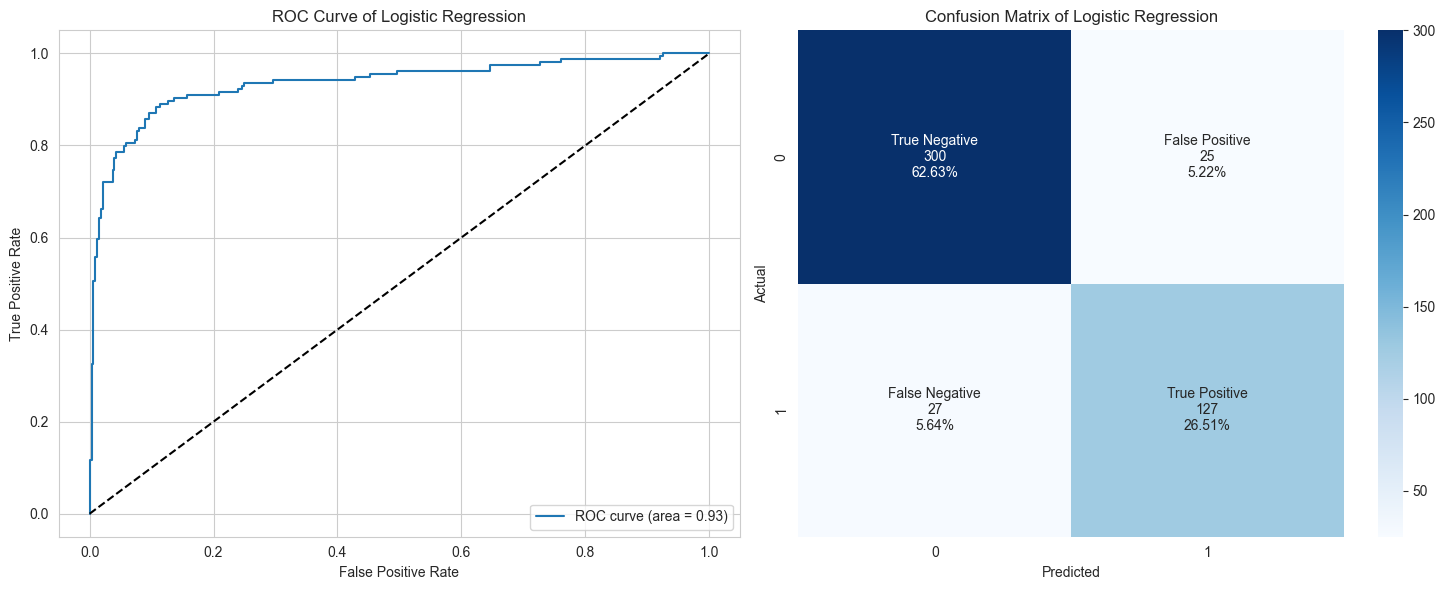

In [86]:
# Get probabilities instead of binary predictions
y_pred_proba_scaled = model_scaled.predict_proba(X_test_scaled)[:, 1]
plot_roc_cm(y_test, y_pred_proba_scaled, model_scaled, 'Logistic Regression')

print()


## Export Model and Results

In [87]:
import pickle

# Save the trained model
with open('student_failure_prediction_model.pkl', 'wb') as file:
    pickle.dump(model_scaled, file)

# Save the scaler
with open('feature_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save feature importance
feature_importance.to_csv('feature_importance.csv', index=False)

print("="*50)
print("MODEL ARTIFACTS SAVED")
print("="*50)
print("✓ student_failure_prediction_model.pkl")
print("✓ feature_scaler.pkl")
print("✓ feature_importance.csv")

MODEL ARTIFACTS SAVED
✓ student_failure_prediction_model.pkl
✓ feature_scaler.pkl
✓ feature_importance.csv


# Summary and Key Findings

In [88]:

print("="*80)
print("PROJECT SUMMARY - STUDENT FAILURE PREDICTION MODEL")
print("="*80)

print("\n📊 DATASET:")
print(f"  • Total students: {len(student_df):,}")
print(f"  • Features used: {len(X_train.columns)}")
print(f"  • Pass rate: {(student_df['PassFail']==0).sum()/len(student_df)*100:.1f}%")
print(f"  • Fail rate: {(student_df['PassFail']==1).sum()/len(student_df)*100:.1f}%")

print("\n🎯 MODEL PERFORMANCE:")
print(f"  • Accuracy: {accuracy*100:.2f}%")
print(f"  • Balanced Accuracy: {balanced_accuracy*100:.2f}%")
print(f"  • F1-Score: {f1*100:.2f}%")
print(f"  • ROC-AUC: {auc_score:.3f}")

print("\n🔍 TOP PREDICTIVE FACTORS:")
for idx, row in feature_importance.head(5).iterrows():
    impact = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"  {idx+1}. {row['Feature']:25} ({impact} failure risk)")

print("\n💡 BUSINESS VALUE:")
print("  • Early identification of at-risk students")
print("  • Data-driven resource allocation for tutoring/support")
print("  • Enables proactive rather than reactive interventions")

print("\n🔧 TECHNICAL HIGHLIGHTS:")
print("  • Feature scaling with StandardScaler")
print("  • Statistical significance testing")
print("  • Multiple evaluation metrics (accuracy, balanced accuracy, F1, ROC-AUC)")
print("  • Feature importance analysis")

print("\n" + "="*80)
print("PROJECT COMPLETE ✓")
print("="*80)

PROJECT SUMMARY - STUDENT FAILURE PREDICTION MODEL

📊 DATASET:
  • Total students: 2,392
  • Features used: 12
  • Pass rate: 67.9%
  • Fail rate: 32.1%

🎯 MODEL PERFORMANCE:
  • Accuracy: 89.14%
  • Balanced Accuracy: 87.39%
  • F1-Score: 83.01%
  • ROC-AUC: 0.934

🔍 TOP PREDICTIVE FACTORS:
  6. Absences                  (decreases failure risk)
  5. StudyTimeWeekly           (increases failure risk)
  8. ParentalSupport           (increases failure risk)
  7. Tutoring                  (increases failure risk)
  9. Extracurricular           (increases failure risk)

💡 BUSINESS VALUE:
  • Early identification of at-risk students
  • Data-driven resource allocation for tutoring/support
  • Enables proactive rather than reactive interventions

🔧 TECHNICAL HIGHLIGHTS:
  • Feature scaling with StandardScaler
  • Statistical significance testing
  • Multiple evaluation metrics (accuracy, balanced accuracy, F1, ROC-AUC)
  • Feature importance analysis

PROJECT COMPLETE ✓


In [89]:
df['PassFail'].value_counts()

PassFail
0    1625
1     767
Name: count, dtype: int64